In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from sklearn import datasets

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits=load_digits()

In [5]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

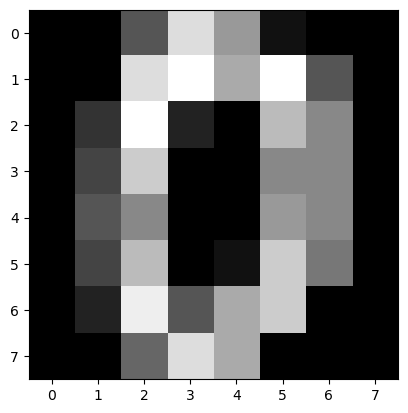

In [6]:
plt.imshow(digits.images[0],cmap=plt.cm.gray)

In [7]:
data1=pd.DataFrame(digits.data)
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


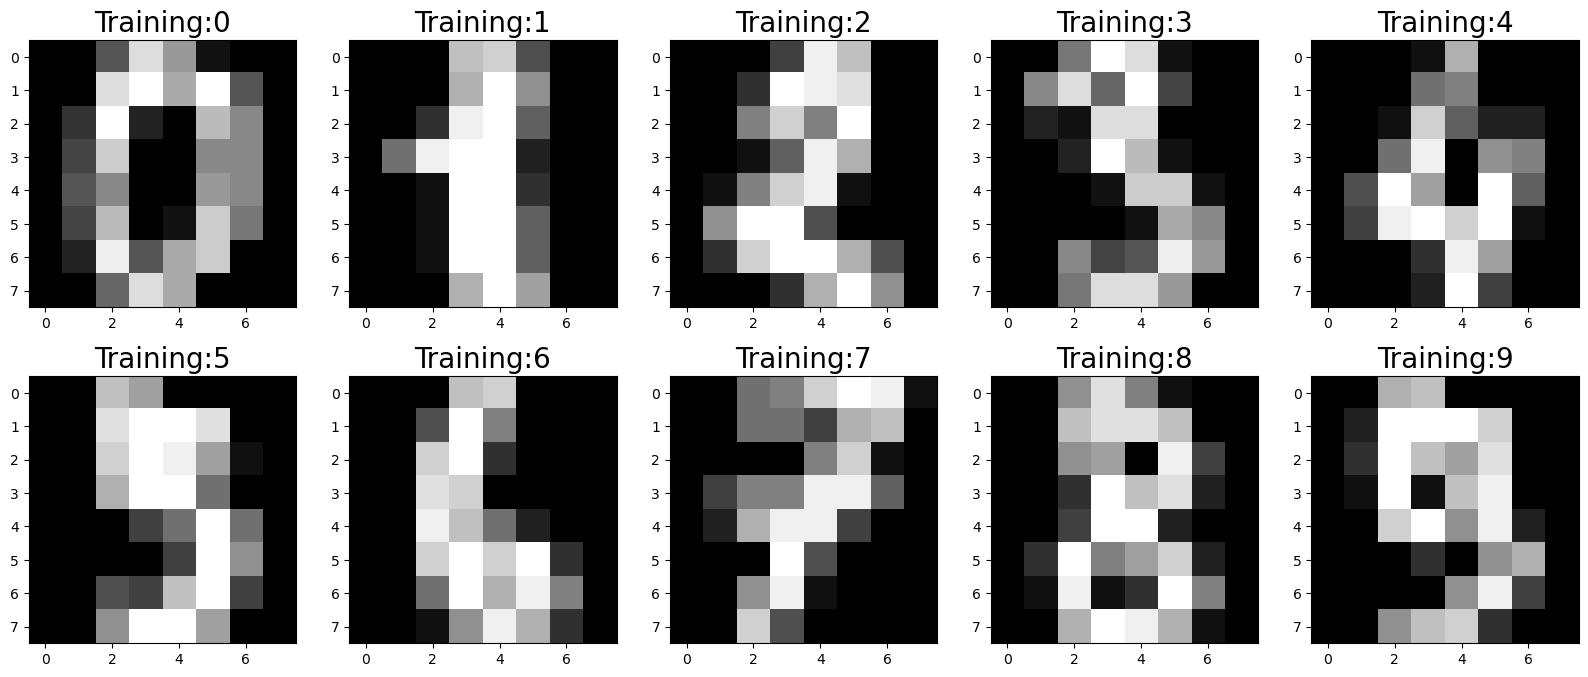

In [8]:
plt.figure(figsize=(20,8))
for index,(image,label) in enumerate (zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(2,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f'Training:{label}',fontsize=20)

In [9]:
x=digits.data
y=digits.target

In [10]:
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)
len(x_std)

1797

In [11]:
x1=x_std.T
x1.shape

(64, 1797)

In [12]:
cov_mat=np.cov(x_std.T)
cov_mat.min()

-0.57051363323811

In [13]:
eig_values,eig_vectors=np.linalg.eig(cov_mat)

In [14]:
len(eig_values)

64

In [15]:
# Explained Variance
tot=sum(eig_values)
var_exp = [(i/tot)*100 for i in sorted(eig_values, reverse=True)] 
var_exp

[12.033916097734895,
 9.561054403097852,
 8.444414892624577,
 6.49840790752417,
 4.8601548759664075,
 4.214119869271947,
 3.942082803567392,
 3.389380924638334,
 2.998221011625232,
 2.932002551252211,
 2.781805463550328,
 2.577055092581994,
 2.2753033157642486,
 2.227179739514349,
 2.1652294318492467,
 1.9141666064421248,
 1.7755470851681954,
 1.6380692742844216,
 1.5964601688623403,
 1.4891911870878174,
 1.3479695658179398,
 1.2719313702347568,
 1.1658373505919504,
 1.057646598536322,
 0.9753159471981102,
 0.944558989731997,
 0.8630138269707238,
 0.8366428536685129,
 0.7976932484112439,
 0.7464713709260609,
 0.7255821513702744,
 0.6919112454811818,
 0.6539085355726157,
 0.6407925738459852,
 0.5913841117223431,
 0.5711624052235227,
 0.5236368034166362,
 0.48180758644514166,
 0.45371925985844846,
 0.4231627532327792,
 0.4060530699790376,
 0.3970848082758281,
 0.3564933031426171,
 0.3407871814703,
 0.327835335287954,
 0.31103200734535635,
 0.2885752941089337,
 0.2764892635235445,
 0.2591

In [16]:
# Cummulative Variance

cum_var_exp=np.cumsum(var_exp)
cum_var_exp.max()

100.0

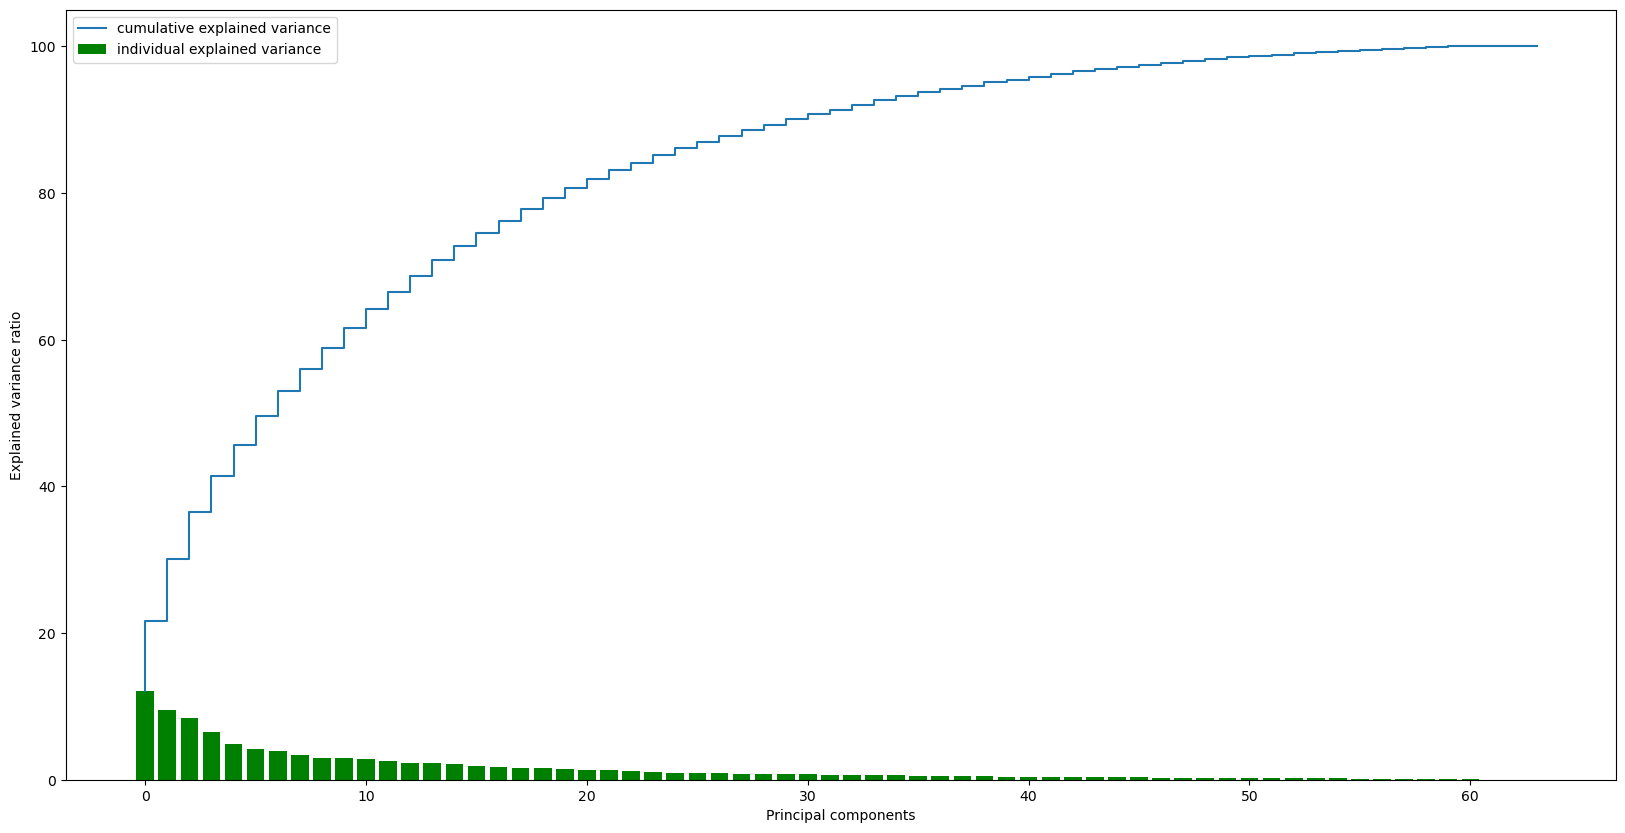

In [17]:
plt.figure(figsize=(20, 10))

plt.bar(range(len(var_exp)), var_exp, label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp,label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend()
plt.show()

Text(0, 0.5, 'cumulative explained variance')

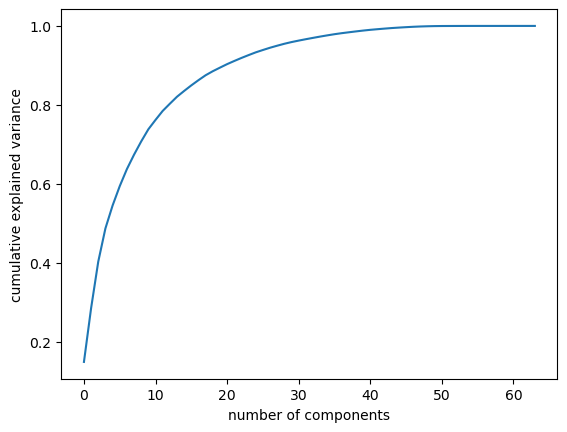

In [18]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,train_size=0.8,random_state=40)

In [20]:
x_train.shape

(1437, 64)

In [21]:
x_test.shape

(360, 64)

In [22]:
pca=PCA(n_components=20,random_state=40)
#pca_x=pca.fit_transform(x_std)
pca_x_train=pca.fit_transform(x_train)
pca_x_test=pca.transform(x_test)

In [23]:
# Decision Tree Classifier with PCA
DTC=DecisionTreeClassifier(random_state=42)
DTC.fit(pca_x_train,y_train)
predicted=DTC.predict(pca_x_test)
predicted
pd.value_counts(np.array(predicted))

3    43
1    42
8    38
4    38
9    36
6    36
7    35
0    34
5    31
2    27
dtype: int64

In [24]:
confusion_matrix(predicted,y_test)

array([[29,  3,  1,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 35,  1,  0,  1,  0,  0,  1,  1,  3],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3, 30,  0,  0,  0,  0,  4,  6],
       [ 0,  1,  0,  0, 33,  1,  0,  0,  2,  1],
       [ 0,  0,  2,  2,  0, 24,  0,  1,  2,  0],
       [ 0,  1,  1,  0,  0,  0, 34,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 32,  1,  0],
       [ 0,  4,  2,  2,  1,  0,  0,  1, 25,  3],
       [ 1,  2,  1,  0,  2,  3,  0,  0,  1, 26]], dtype=int64)

In [25]:
def get_misclassified_index(predicted,y_test):
    misclassification=[]
    for index,(predicted,actual) in enumerate(zip(predicted,y_test)):
        if predicted!=actual:
            misclassification.append(index)
    return misclassification
misclassification=get_misclassified_index(predicted,y_test)
len(misclassification)

65

In [26]:
accuracy_score(predicted,y_test)

0.8194444444444444

In [27]:
# Decision Tree Classifier without PCA

DTC1=DecisionTreeClassifier(random_state=40)
DTC1.fit(x_train,y_train)
predicted_DTC1=DTC1.predict(x_test)
predicted_DTC1
pd.value_counts(np.array(predicted_DTC1))

9    43
1    43
4    39
2    38
7    36
3    34
6    34
8    33
0    31
5    29
dtype: int64

In [28]:
confusion_matrix(predicted_DTC1,y_test)

array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 34,  1,  2,  1,  0,  0,  2,  1,  2],
       [ 0,  2, 30,  2,  0,  0,  0,  0,  2,  2],
       [ 0,  1,  3, 24,  0,  2,  0,  1,  1,  2],
       [ 0,  1,  1,  0, 35,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0, 24,  1,  1,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  0,  0, 30,  3,  0],
       [ 0,  2,  2,  2,  0,  0,  0,  0, 26,  1],
       [ 0,  5,  1,  2,  0,  1,  0,  0,  3, 31]], dtype=int64)

In [29]:
def get_misclassified_index(predicted_DTC1,y_test):
    misclassification=[]
    for index,(predicted_DTC1,actual) in enumerate(zip(predicted_DTC1,y_test)):
        if predicted_DTC1!=actual:
            misclassification.append(index)
    return misclassification
misclassification=get_misclassified_index(predicted_DTC1,y_test)
len(misclassification)

63

In [30]:
accuracy_score(predicted_DTC1,y_test)

0.825